In [2]:
import pandas as pd # type: ignore
import numpy as np #type: ignore
import tensorflow as tf #type: ignore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

In [3]:
df = pd.read_csv('cover_data.csv')
df.columns = df.columns.str.strip()

In [4]:
features = df.drop('class', axis=1)
labels = df['class']

In [5]:
continuous_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', ]

hillshade_features = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

binary_features = [col for col in features.columns if col.startswith('Wilderness_Area') or col.startswith('Soil_Type')]

In [6]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
label_encoder = LabelEncoder()

features_train_scaled = features_train
features_test_scaled = features_test

features_train_scaled[continuous_features] = standard_scaler.fit_transform(features_train[continuous_features])
features_test_scaled[continuous_features] = standard_scaler.transform(features_test[continuous_features])

features_train_scaled[hillshade_features] = min_max_scaler.fit_transform(features_train[hillshade_features])
features_test_scaled[hillshade_features] = min_max_scaler.transform(features_test[hillshade_features])

labels_train_encoded = label_encoder.fit_transform(labels_train)
labels_test_encoded = label_encoder.transform(labels_test)

In [7]:
num_classes = 7
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(features_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(features_train_scaled, labels_train_encoded, epochs=50, batch_size=30, validation_split=0.2)

Epoch 1/50


/Users/nathaneldering/Desktop/my_projects/Python/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 294us/step - accuracy: 0.7346 - loss: 0.6279 - val_accuracy: 0.7958 - val_loss: 0.4841
Epoch 2/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 288us/step - accuracy: 0.7963 - loss: 0.4761 - val_accuracy: 0.8148 - val_loss: 0.4375
Epoch 3/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 287us/step - accuracy: 0.8156 - loss: 0.4369 - val_accuracy: 0.8279 - val_loss: 0.4116
Epoch 4/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 287us/step - accuracy: 0.8260 - loss: 0.4125 - val_accuracy: 0.8316 - val_loss: 0.3983
Epoch 5/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 284us/step - accuracy: 0.8344 - loss: 0.3940 - val_accuracy: 0.8376 - val_loss: 0.3861
Epoch 6/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 285us/step - accuracy: 0.8398 - loss: 0.3842 - val_accuracy: 0.8447 - val_loss: 0.3774
Epoch 7/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 284us/step - accuracy: 0.8439 - loss: 0.3724 - val_accuracy: 0.8493 - val_loss: 0.3598
Epoch 8/50
12395/12395 ━━━━━━━━━━━━━━━━━━━━ 4s 286us/step - accuracy: 0.8

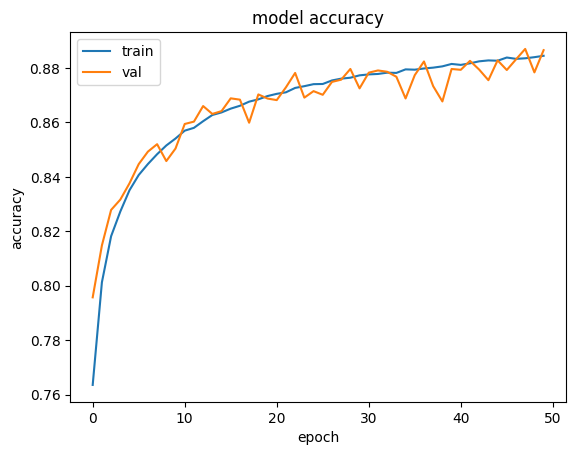

In [9]:
plot_history(history, 'acc')

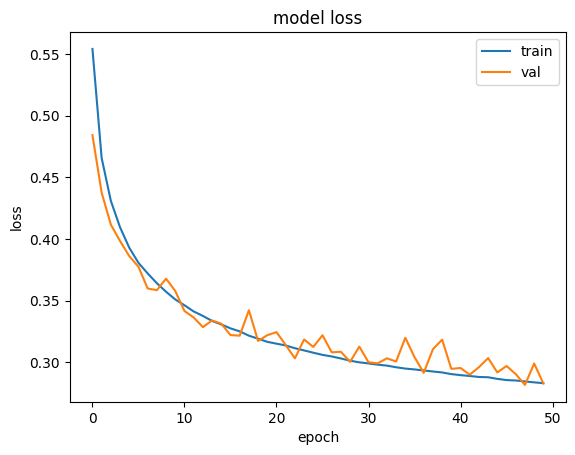

In [10]:
plot_history(history, 'loss')

In [46]:
predictions = model.predict(features_test_scaled)
labels_predict_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(labels_test_encoded, labels_predict_classes)
report = classification_report(labels_test_encoded, labels_predict_classes)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 1s 171us/step


In [47]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     42557
           1       0.89      0.91      0.90     56500
           2       0.89      0.87      0.88      7121
           3       0.84      0.69      0.76       526
           4       0.78      0.63      0.70      1995
           5       0.78      0.78      0.78      3489
           6       0.86      0.92      0.89      4015

    accuracy                           0.88    116203
   macro avg       0.85      0.81      0.83    116203
weighted avg       0.88      0.88      0.88    116203



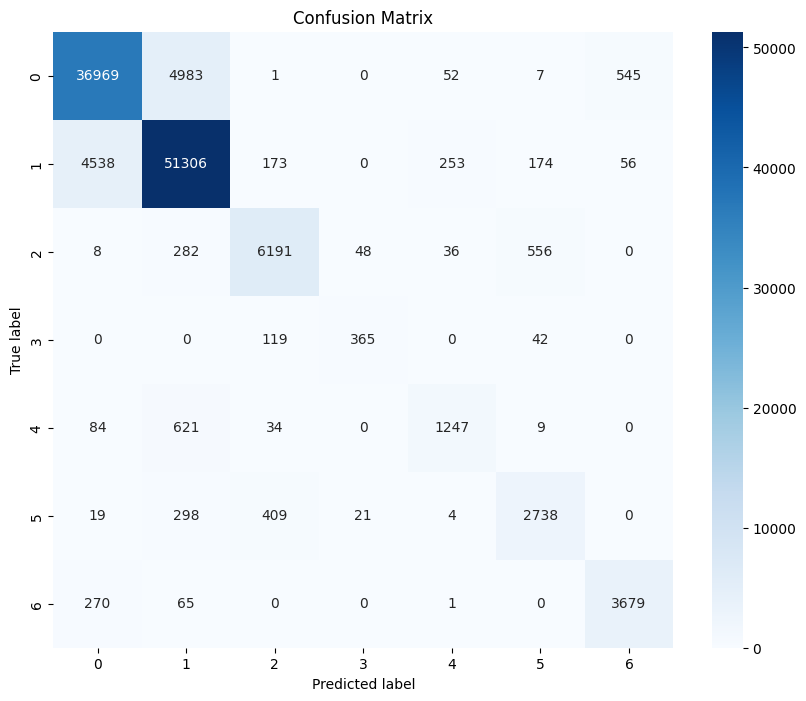

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()